<a href="https://colab.research.google.com/github/RautRitesh/langgraph/blob/main/interview_taker_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
parsed_data_resume={'full_name': 'Ritesh Raut',
                    'summary': 'I am a dedicated and passionate undergraduate Computer Science student with extensive research experience in Deep Learning, Natural Language Processing (NLP), RAG architectures, autonomous AI agents, and production-grade system development.',
                    'email': 'ritesh222@gmail.com',
                    'phone': '+977-12345678',
                    'skills': ['Python', 'C++', 'Julia', 'JavaScript', 'Dart', 'C#', 'TensorFlow', 'Scikit-learn', 'Pandas', 'NumPy', 'FAISS', 'LangChain', 'Hugging Face Transformers', 'RAG Architectures', 'SpaCy', 'NLTK', 'Git', 'GitHub', 'FastAPI', 'Django', 'Linux/Unix environments', 'Deep Learning', 'Computer Vision', 'Transfer Learning', 'System Scalability', 'Strategic Problem Solving', 'Cross-Functional Collaboration', 'User-Centric Design', 'Technical Communication'],
                    'work_experience': [
                        {'role': 'AI/ML Intern',
                         'company': 'Huncha Digital',
                         'duration': 'August 2025 – November 2025',
                         'technologies': ['LangGraph', 'React', 'NLP', 'Speech Recognition', 'Machine Learning'],
                         'key_achievements': ['Engineered a scalable LangGraph React Agent, implementing robust backend logic to autonomously resolve 100+ daily user queries with 93% accuracy, significantly reducing manual support load.', 'Developed a voice-based food ordering system leveraging NLP and speech recognition, increasing order processing efficiency by 30%.', 'Implemented multi-modal AI architectures integrating text, voice, and retrieval intelligence to optimize user interaction flows.', 'Collaborated with cross-functional teams to design and integrate multi-modal AI systems, aligning technical implementations with business requirements for text and voice intelligence.']},
                         {'role': 'Academic Researcher',
                          'company': 'Tribhuvan University',
                          'duration': 'Spring 2024 – Present',
                          'technologies': ['Machine Learning', 'Regression', 'Clustering', 'Power BI'],
                          'key_achievements': ['Executed predictive modeling using Machine Learning algorithms (Regression & Clustering) on demographic data from 10 administrative wards to forecast service bottlenecks and optimize digital service delivery.',
                                               'Applied analytical skills to audit Nepal’s National Identity (NNID) biometric architectures and cybersecurity protocols, proposing enhanced data protection mechanisms to mitigate identity fraud.', 'Engineered dynamic Power BI dashboards to visualize citizen interaction patterns for a population of 70,000+, achieving a 20% increase in municipal work efficiency through data-driven resource allocation.']}
                        ],
                    'projects': [
                        {'name': 'Cogni-chat: RAG-Based Document Analysis System', 'description': 'Engineered a web-based Retrieval-Augmented Generation (RAG) application enabling conversational interaction with PDF, DOCX, and TXT files.',
                         'technologies': ['RAG', 'Hugging Face', 'FAISS'], 'url': 'Hugging Face Space'},
                         {'name': 'AI-Powered Skincare Diagnostic System', 'description': 'Developed and trained a custom Convolutional Neural Network (CNN) on diverse datasets, achieving a validation accuracy of 82% for skin type classification.',
                          'technologies': ['Convolutional Neural Network', 'FastAPI'], 'url': None},
                           {'name': 'Community Interest Calculator', 'description': 'Architected and deployed a localized mobile application using Flutter, automating complex interest calculations for community finance groups.',
                            'technologies': ['Flutter'], 'url': None}
                        ],
                    'education': [{'degree': 'Bachelor of Science in Computer Science and Information Technology', 'institution': 'Tribhuvan University', 'year': 'Ongoing'}], 'certifications': []}



In [64]:
full_name=parsed_data_resume.get("full_name")
work_experience=parsed_data_resume.get("work_experience")
projects=parsed_data_resume.get("projects")

In [3]:
job_description="""Focus: Neural Networks, LLM Agents (LangChain & LangGraph)
Type: Internship (Full-time / Part-time / Remote / On-site – customize)
Duration: 3–6 Months
Location: Nepal / Remote

About the Role

We are looking for a hands-on AI/ML Intern who enjoys building things—not just reading papers. You will work on real-world AI systems, including neural network models and LLM-based agents using LangChain and LangGraph.

This is a build-first internship. If you like experimenting, breaking things, fixing them, and shipping working AI features—this role is for you."""



In [4]:
pip install langchain langchain-groq langchain-community langchain-core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [22]:
from typing import TypedDict, Literal
from langchain_groq import ChatGroq
from langgraph.graph import MessagesState, StateGraph, START, END
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langgraph.checkpoint.memory import MemorySaver

In [31]:
memory=MemorySaver()

In [32]:
class WorkExperience(TypedDict):
  role:str
  company:str
  technologies:list[str]
  key_achievements:list[str]

class Projects(TypedDict):
  name:str
  description:str
  technologies:list[str]

In [33]:
class AgentState(MessagesState):
  workexperience:list[WorkExperience]
  projects:list[Projects]
  full_name:str
  job_description:str

In [34]:
from google.colab import userdata
api_key=userdata.get('groq_api_key')

In [35]:
llm=ChatGroq(model="openai/gpt-oss-120b",api_key=api_key)

In [56]:
system_prompt="""You are hr agent whose main task is to ask question to the individual, you have got access to the user 'full_name' and the 'projects' , 'workexperience', 'job_description'.
Your task is to generate the best question never say any answer, and also you have access to the previous answers of the user and question, you can also ask followup question if the answer is weak."""
prompt=ChatPromptTemplate.from_messages([
    ("system",system_prompt),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user","The  full_name of user is {full_name},{projects},{workexperience},{job_description}")

])
llm_question_generator=prompt | StrOutputParser()

In [57]:
def agent_node(state:AgentState):
  chat_history=state["messages"][:-2]
  work_experience=state.get("workexperience")
  job_description=state.get("job_description")
  full_name=state.get("full_name")
  projects=state.get("projects",[])
  response=llm_question_generator.invoke({"chat_history":chat_history,"full_name":full_name,"work_experience":work_experience,"job_description":job_description,"projects":projects})
  return {"messages":[response]}

In [58]:
def human_feedback(state:AgentState):
  pass


In [59]:
def router(state:AgentState)->Literal[END,"hr_agent"]:
  messages=state["messages"]
  if len(messages)>10:
    return END
  else:
    return "hr_agent"

In [60]:
graph=StateGraph(AgentState)
graph.add_node("hr_agent",agent_node)
graph.add_node("human_feedback",human_feedback)
graph.set_entry_point("hr_agent")
graph.add_edge("hr_agent","human_feedback")
graph.add_conditional_edges("human_feedback",router,{END:END,"hr_agent":"hr_agent"})
app=graph.compile(checkpointer=memory,interrupt_before=["human_feedback"])



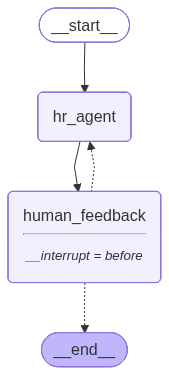

In [61]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [62]:
config={"configurable":{"thread_id":"2"}}

In [65]:
app.invoke({"workexperience":work_experience,"full_name":full_name,"job_description":job_description,"messages":"start to ask question please","projects":projects},config=config)

KeyError: "Input to ChatPromptTemplate is missing variables {'workexperience'}.  Expected: ['chat_history', 'full_name', 'job_description', 'projects', 'workexperience'] Received: ['chat_history', 'full_name', 'work_experience', 'job_description', 'projects']\nNote: if you intended {workexperience} to be part of the string and not a variable, please escape it with double curly braces like: '{{workexperience}}'.\nFor troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/INVALID_PROMPT_INPUT "